# Part 1: Exploratory Data Analysis

## Part 1.1: Understand the Raw Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
credit_risk = 'https://raw.githubusercontent.com/tracysnowf/Deloitte-CapstoneProject/main/data/Mortgage%20Lending_raw.csv'
df_cr = pd.read_csv(credit_risk, sep = ',')

In [4]:
df_cr.head() # column 0 is redundant

,Unnamed: 0,derived_ethnicity,derived_race,derived_sex,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_only_payment,balloon_payment,income,debt_to_income_ratio,applicant_age
0,0,Not Hispanic or Latino,Black or African American,Female,1,2,1,32,105000.0,75.0,2,2,91.0,48,35-44
1,1,Not Hispanic or Latino,Black or African American,Female,3,2,1,31,275000.0,52.38,2,2,142.0,44,>74
2,2,Hispanic or Latino,White,Male,3,2,1,1,235000.0,80.0,2,2,60.0,38,35-44
3,3,Not Hispanic or Latino,White,Male,1,2,1,1,465000.0,94.69,2,2,112.0,42,35-44
4,4,Not Hispanic or Latino,Black or African American,Male,1,1,3,1,415000.0,100.0,2,2,83.0,50%-60%,25-34


In [5]:
# check data info
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14509 entries, 0 to 14508
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             14509 non-null  int64  
 1   derived_ethnicity      14509 non-null  object 
 2   derived_race           14509 non-null  object 
 3   derived_sex            14509 non-null  object 
 4   action_taken           14509 non-null  int64  
 5   preapproval            14509 non-null  int64  
 6   loan_type              14509 non-null  int64  
 7   loan_purpose           14509 non-null  int64  
 8   loan_amount            14509 non-null  float64
 9   loan_to_value_ratio    13902 non-null  object 
 10  interest_only_payment  14509 non-null  int64  
 11  balloon_payment        14509 non-null  int64  
 12  income                 14027 non-null  float64
 13  debt_to_income_ratio   13787 non-null  object 
 14  applicant_age          14509 non-null  object 
dtypes:

In [6]:
# check the unique values for each column
df_cr.nunique()

Unnamed: 0               14509
derived_ethnicity            5
derived_race                 9
derived_sex                  2
action_taken                 2
preapproval                  2
loan_type                    4
loan_purpose                 6
loan_amount                237
loan_to_value_ratio       7074
interest_only_payment        3
balloon_payment              3
income                     778
debt_to_income_ratio        20
applicant_age                8
dtype: int64

In [7]:
df_cr = df_cr.drop('Unnamed: 0', 1) # delete index column from csv

C:\Users\Xue Feng\AppData\Local\Temp\ipykernel_3788\378486231.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_cr = df_cr.drop('Unnamed: 0', 1) # delete index column from csv


##### action_taken - Y variable
1 -- Loan originated (the qualification and verification process that begins a new loan.) <br>
2 -- Application approved but not accepted (If the loan was approved before closing but the applicant either failed to respond or the loan was not otherwise closed, then the action taken would be reported as approved but not accepted.) <br>
3 -- Application denied by financial institution <br>

Comments: <br>
category 1 (a typo) might actually be 2(Approved) in the codebook, and 3 stays the same(Disapproved)

In [8]:
pd.unique(df_cr['action_taken'])

array([1, 3], dtype=int64)

In [9]:
# new codebook: 1 - Approved; 0 - Disapproved
# so change all the vlaues of 3 to 0
df_cr['action_taken'].mask((df_cr['action_taken'] == 3), 0, inplace=True)

In [10]:
# check the distribution of target variable action_taken
df_cr.loc[:,'action_taken'].value_counts()

1    10871
0     3638
Name: action_taken, dtype: int64

## Part 1.2: Understand the Features

In [11]:
# understand overall features
df_cr.describe()
# Action Taken:
# 1 -- Loan originated
# 2 -- Application approved but not accepted
# 3 -- Application denied by financial institution

# Preapproval:
# 1 -- Preapproval was requested
# 2 -- Preapproval was not requested

# Loan Type: **75% IQR = 1
# 1 -- Conventional (any loan other than FHA, VA, FSA, or RHS loans)
# 2 -- FHA-insured (Federal Housing Administration)
# 3 -- VA-guaranteed (Veterans Administration)
# 4 -- FSA/RHS (Farm Service Agency or Rural Housing Service)

# Loan Purpose: **error data,
# 1 -- Home purchase
# 2 -- Home improvement
# 3 -- Refinancing

# Loan Amount: in thousands of dollars

# interest_only_payment **not in the codebook, 1111？

# balloon_payment **not in the codebook, 1111？

# income: Gross Annual Income: in thousands of dollars **negative/ error data

,action_taken,preapproval,loan_type,loan_purpose,loan_amount,interest_only_payment,balloon_payment,income
count,14509.000000,14509.000000,14509.000000,14509.000000,1.450900e+04,14509.000000,14509.000000,14027.000000
mean,0.749259,1.978979,1.147081,14.755669,3.924981e+05,14.098973,14.135295,160.826335
std,0.433455,0.143461,0.459418,14.860877,3.340678e+05,115.466461,115.462492,297.351109
min,0.000000,1.000000,1.000000,1.000000,5.000000e+03,1.000000,1.000000,-123.000000
25%,0.000000,2.000000,1.000000,1.000000,1.950000e+05,2.000000,2.000000,79.000000
50%,1.000000,2.000000,1.000000,4.000000,3.450000e+05,2.000000,2.000000,116.000000
75%,1.000000,2.000000,1.000000,31.000000,5.050000e+05,2.000000,2.000000,170.000000
max,1.000000,2.000000,4.000000,32.000000,7.505000e+06,1111.000000,1111.000000,20000.000000


### Numerical Features Data Cleaning 

In [12]:
# understand numerical features
# loan_amount look normal, need to clean column loan_to_value_ratio, income
df_cr[["loan_amount", "loan_to_value_ratio", "income"]].describe()

,loan_amount,income
count,1.450900e+04,14027.000000
mean,3.924981e+05,160.826335
std,3.340678e+05,297.351109
min,5.000000e+03,-123.000000
25%,1.950000e+05,79.000000
50%,3.450000e+05,116.000000
75%,5.050000e+05,170.000000
max,7.505000e+06,20000.000000


##### loan_to_value_ratio 
Description: The ratio of the total amount of debt secured by the property to the value of the property relied on in making the credit decisiontio. The ratio value should range from 0 - 1.

In [13]:
pd.unique(df_cr['loan_to_value_ratio'])

array(['75.0', '52.38', '80.0', ..., '68.883', '87.03', '52.45'],
      dtype=object)

In [14]:
df_cr['loan_to_value_ratio'].map(type).value_counts()

<class 'str'>      13902
<class 'float'>      607
Name: loan_to_value_ratio, dtype: int64

In [15]:
# 607 null values
len(df_cr[pd.to_numeric(df_cr['loan_to_value_ratio'].isnull(),errors='coerce')])

607

In [16]:
# 159 Exempt values
len(df_cr[(df_cr['loan_to_value_ratio'] == "Exempt")])

159

In [17]:
# drop 607 null values and 159 Exempt values
df_cr = df_cr[pd.to_numeric(df_cr['loan_to_value_ratio'].notnull(),errors='coerce')]
df_cr = df_cr[(df_cr['loan_to_value_ratio'] != "Exempt")]
# reset index
df_cr = df_cr.reset_index(drop = True)
# cast string types of values to numeric type
df_cr['loan_to_value_ratio'] = pd.to_numeric(df_cr['loan_to_value_ratio'], errors='coerce')

In [18]:
len(df_cr[(df_cr['loan_to_value_ratio'] > 1)])

13739

In [19]:
# check the result
df_cr['loan_to_value_ratio'].map(type).value_counts()

<class 'float'>    13743
Name: loan_to_value_ratio, dtype: int64

In [20]:
plt.rcParams['figure.dpi'] = 100

##### log_loan_to_value_ratio (NEW column for log reg)
Description: The log of the ratio of the total amount of debt secured by the property to the value of the property relied on in making the credit decisiontio.

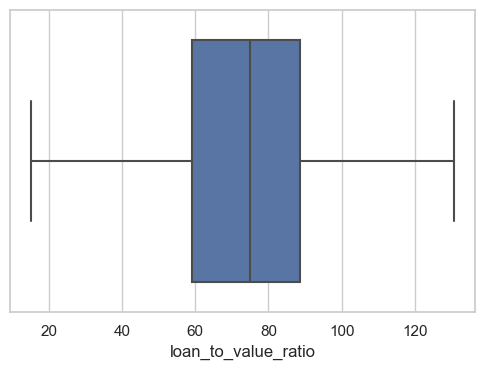

In [21]:
# boxplot shows loan_to_value_ratio (without outliers) is a little left-skewed, so perform the log transformation
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_cr["loan_to_value_ratio"], data = df_cr, showfliers = False)

In [22]:
df_cr['log_loan_to_value_ratio'] = np.log2(df_cr['loan_to_value_ratio'])

##### income (in thousands of dollars)

In [23]:
# 252 null values
len(df_cr[pd.to_numeric(df_cr['income'].isnull(),errors='coerce')])

252

In [24]:
# 10 negative/ error values, will keep them in the data
len(df_cr[(df_cr['income'] < 0)])

10

In [25]:
# drop 252 null values
df_cr = df_cr[pd.to_numeric(df_cr['income'].notnull(),errors='coerce')]
# reset index
df_cr = df_cr.reset_index(drop = True)

In [26]:
# check the result
df_cr['loan_to_value_ratio'].map(type).value_counts()

<class 'float'>    13491
Name: loan_to_value_ratio, dtype: int64

#### Cleaned Numeric Features Summary

In [27]:
# understand numeric features
df_cr[["loan_amount", "loan_to_value_ratio", "income"]].describe()

,loan_amount,loan_to_value_ratio,income
count,1.349100e+04,13491.000000,13491.000000
mean,3.937288e+05,71.587950,162.098732
std,3.268893e+05,27.608336,295.949162
min,5.000000e+03,0.541000,-123.000000
25%,1.950000e+05,59.090000,80.000000
50%,3.450000e+05,75.000000,118.000000
75%,5.050000e+05,88.317000,172.000000
max,7.505000e+06,999.999000,20000.000000


#### Correlation of Numeric Features

In [28]:
# correlation heat map of numerical features
sns.set()

numCol = []
for col in df_cr:
  if df_cr[col].dtype == np.float64:
    numCol.append(col)
corr = df_cr[numCol].corr()

[Text(0.5, 0, 'loan_amount'),
 Text(1.5, 0, 'loan_to_value_ratio'),
 Text(2.5, 0, 'income'),
 Text(3.5, 0, 'log_loan_to_value_ratio')]

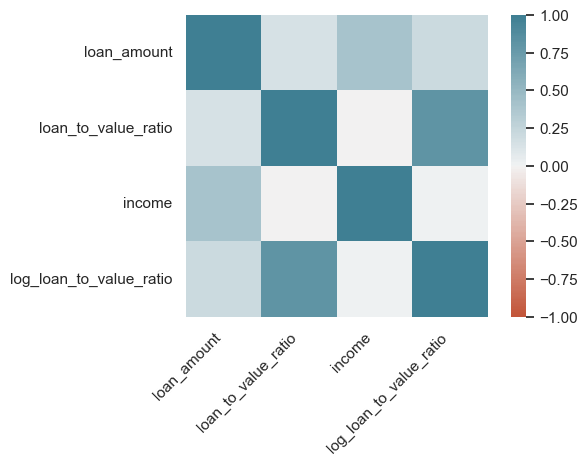

In [29]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [30]:
# check the actual values of correlations
corr_score = df_cr[numCol].corr()
corr_score
# heatmap conclusion: all good, no column needs to be dropped.
# ***but keep in mind that loan_amount and loan_to_value_ratio are not dependent - might need to drop one of them when using linear/ logistic regression

,loan_amount,loan_to_value_ratio,income,log_loan_to_value_ratio
loan_amount,1.000000,0.145522,0.400237,0.208116
loan_to_value_ratio,0.145522,1.000000,-0.003318,0.806731
income,0.400237,-0.003318,1.000000,0.013264
log_loan_to_value_ratio,0.208116,0.806731,0.013264,1.000000


### Cleaned Numerical Features -> Categorical Features

##### derived_income (NEW column for income)
INCOME GROUP - INCOME  <br>
Poor or near-poor - \\$32,048 or less <br>
Lower-middle class - \\$32,048 - \\$53,413 <br>
Middle class - \\$53,413 - \\$106,827 <br>
Upper-middle class - \\$106,827 - \\$373,894 <br>
Rich - \\$373,894 and up <br>
(resource: https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system)

In [31]:
# bin income into the 5 categories above
# create a list of our conditions
income_conditions = [
    (df_cr['income']*1000 <= 32048),
    (df_cr['income']*1000 > 32048) & (df_cr['income']*1000 <= 53413),
    (df_cr['income']*1000 > 53413) & (df_cr['income']*1000 <= 106827),
    (df_cr['income']*1000 > 106827) & (df_cr['income']*1000 <= 373894),
    (df_cr['income']*1000 > 373894)
    ]

# create a list of the values we want to assign for each condition
# ***income_values = ['Poor and Near Poor', 'Lower-Middle Class', 'Middle Class', 'Upper-Middle Class', 'Rich']
income_values = [1, 2, 3, 4, 5]

# create a new column and use np.select to assign values to it using our lists as arguments
df_cr['derived_income'] = np.select(income_conditions, income_values)

<AxesSubplot:>

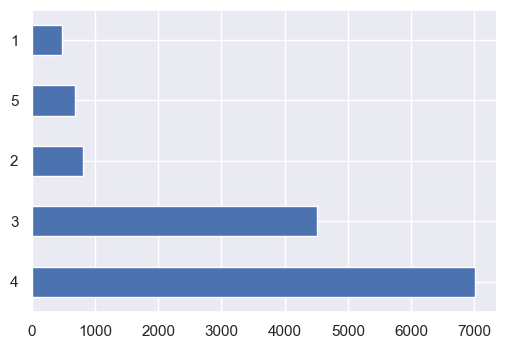

In [32]:
# explore derived_income category
df_cr["derived_income"].value_counts().plot(kind='barh')

##### derived_loan_to_value_ratio (NEW column for loan_to_value_ratio)
Conventional bar - 80% or less <br>
FHA bar -	96.5% or less <br>
VA bar - 100% or less <br>
Not eligible - > 100%
(resource: https://www.forbes.com/advisor/mortgages/loan-to-value-ratio/)

In [33]:
# bin loan_to_value_ratio into the 4 categories above
# create a list of our conditions
loan_to_value_ratio_conditions = [
    (df_cr['loan_to_value_ratio'] <= 80),
    (df_cr['loan_to_value_ratio'] > 80) & (df_cr['loan_to_value_ratio'] <= 96.5),
    (df_cr['loan_to_value_ratio'] > 96.5) & (df_cr['loan_to_value_ratio'] <= 100),
    (df_cr['loan_to_value_ratio'] > 100)
    ]

# create a list of the values we want to assign for each condition
# *** loan_to_value_ratio_values = ['< Conventional Bar', '> Conventional Bar and < FHA Bar', '> FHA Bar and < VA Bar', 'Not Eligible']
loan_to_value_ratio_values = [2, 3, 4, 1]
# create a new column and use np.select to assign values to it using our lists as arguments
df_cr['derived_loan_to_value_ratio'] = np.select(loan_to_value_ratio_conditions, loan_to_value_ratio_values)

<AxesSubplot:>

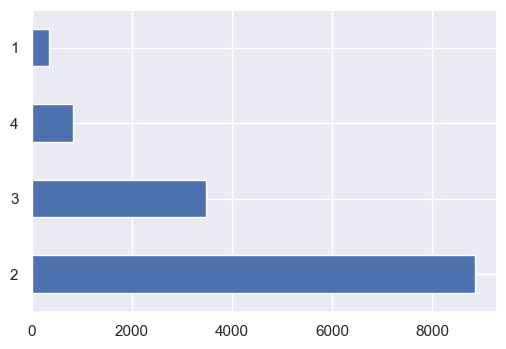

In [34]:
# explore derived_loan_to_value_ratio category
df_cr["derived_loan_to_value_ratio"].value_counts().plot(kind='barh')

### Categorical Features Data Cleaning 

##### interest_only_payment
Description: Whether the contractual terms include, or would have included, interest-only payments
Values: <br>
1 - Interest-only payments <br>
2 - No interest-only payments <br>
1111 - Exempt <br>

NEW: <br>
1 -> Interest-only Payments <br>
2 -> No Interest-only Payments

In [35]:
# replace "Exempt" with NAs
df_cr['interest_only_payment'].mask((df_cr['interest_only_payment'] == 'Exempt'), None, inplace=True)

In [36]:
# drop null values
df_cr = df_cr[pd.to_numeric(df_cr['interest_only_payment'].notnull(),errors='coerce')]

In [37]:
# reset index
df_cr = df_cr.reset_index(drop = True)

In [38]:
# *** # rename
# df_cr['interest_only_payment'].mask((df_cr['interest_only_payment'] == 1), 'Interest-only Payments', inplace=True)
# df_cr['interest_only_payment'].mask((df_cr['interest_only_payment'] == 2), 'No Interest-only Payments', inplace=True)

# rename
df_cr['interest_only_payment'].mask((df_cr['interest_only_payment'] == 1), 1, inplace=True)
df_cr['interest_only_payment'].mask((df_cr['interest_only_payment'] == 2), 0, inplace=True)


<AxesSubplot:>

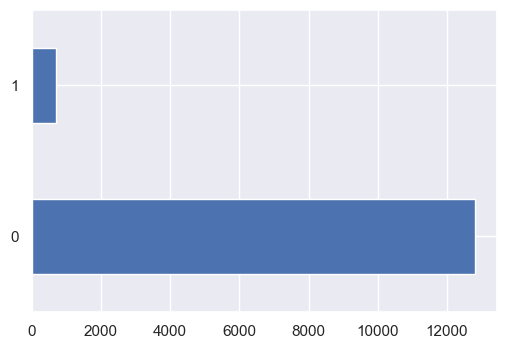

In [39]:
# explore interest_only_payment category
df_cr["interest_only_payment"].value_counts().plot(kind='barh')

##### balloon_payment
Description: Whether the contractual terms include, or would have included, a balloon payment
Values: <br>
1 - Balloon payment <br>
2 - No balloon payment <br>
1111 - Exempt <br>

NEW: <br>
1 -> Balloon Payment <br>
2 -> No Balloon Payment

In [40]:
# replace "Exempt" with NAs
df_cr['balloon_payment'].mask((df_cr['balloon_payment'] == 'Exempt'), None, inplace=True)

In [41]:
# drop null values
df_cr = df_cr[pd.to_numeric(df_cr['balloon_payment'].notnull(),errors='coerce')]

In [42]:
# reset index
df_cr = df_cr.reset_index(drop = True)

In [43]:
# ***# rename
# df_cr['balloon_payment'].mask((df_cr['balloon_payment'] == 1), 'Balloon Payment', inplace=True)
# df_cr['balloon_payment'].mask((df_cr['balloon_payment'] == 2), 'No Balloon Payment', inplace=True)

# rename
df_cr['balloon_payment'].mask((df_cr['balloon_payment'] == 1), 1, inplace=True)
df_cr['balloon_payment'].mask((df_cr['balloon_payment'] == 2), 0, inplace=True)

<AxesSubplot:>

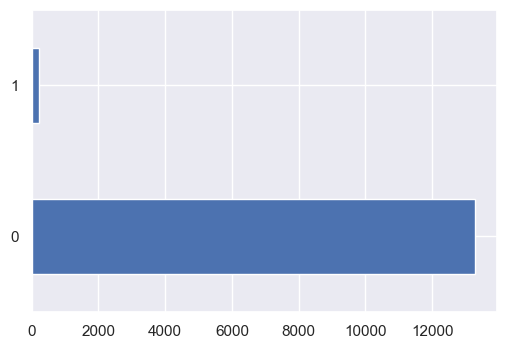

In [44]:
# explore balloon_payment category
df_cr["balloon_payment"].value_counts().plot(kind='barh')

##### preapproval_requested (old: preapproval)
1 -- Preapproval was requested <br>
2 -- Preapproval was not requested <br>

NEW: <br>
Preapprove Requested - Preapproval was requested <br>
No Preapprove Requested - Preapproval was not requested <br>

rename column: preapproval -> preapproval_requested

In [45]:
# *** rename
# df_cr['preapproval'].mask((df_cr['preapproval'] == 1), "Preapproval Requested", inplace=True)
# df_cr['preapproval'].mask((df_cr['preapproval'] == 2), "No Preapproval Requested", inplace=True)

# rename
df_cr['preapproval'].mask((df_cr['preapproval'] == 1), 1, inplace=True)
df_cr['preapproval'].mask((df_cr['preapproval'] == 2), 0, inplace=True)

In [46]:
# change column name 'preapproval' -> 'preapproval_requested'
df_cr.rename(columns={'preapproval': 'preapproval_requested'}, inplace=True)

<AxesSubplot:>

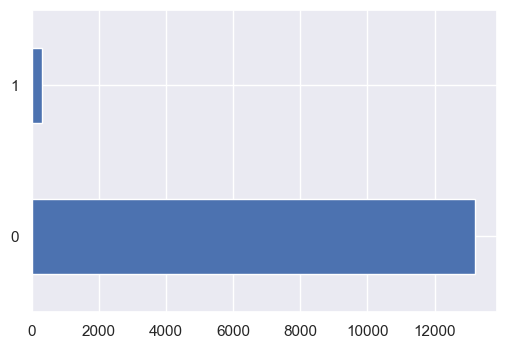

In [47]:
# explore loan_type category
df_cr["preapproval_requested"].value_counts().plot(kind='barh')

##### loan_type
1 -- Conventional (any loan other than FHA, VA, FSA, or RHS loans) <br>
2 -- FHA-insured (Federal Housing Administration) <br>
3 -- VA-guaranteed (Veterans Administration) <br>
4 -- FSA/RHS (Farm Service Agency or Rural Housing Service) <br>

Comments: <br>
75% IQR = 1 <br>
About 90% of the whole loan type is type 1 - Conventional among the 4 types. <br>
Is this data representative to the whole population? <br>
possible research directions: if people with a Conventional loan type have an obviously higher/lower chance to get approved for the loan compared to people with a NON Conventional loan type?

In [48]:
# changed 1, 2, 3, 4 to their corresponding categorical names
# df_cr['loan_type'].mask((df_cr['loan_type'] == 1), 'Converntional', inplace=True)
# df_cr['loan_type'].mask((df_cr['loan_type'] == 2), 'FHA-insured', inplace=True)
# df_cr['loan_type'].mask((df_cr['loan_type'] == 3), 'VA-guaranteed', inplace=True)
# df_cr['loan_type'].mask((df_cr['loan_type'] == 4), 'FSA/RHS', inplace=True)

In [49]:
# len(df_cr[df_cr['loan_type'] == 'Converntional']) / len(df_cr['loan_type'])

In [50]:
# *** number of 'FSA/RHS' is only 2, not representative, so drop this category
# len(df_cr[df_cr['loan_type'] == 'FSA/RHS'])

# number of 'FSA/RHS' is only 2, not representative, so drop this category
len(df_cr[df_cr['loan_type'] == 4])

2

In [51]:
# *** drop 'FSA/RHS' column
# df_cr.drop(df_cr[df_cr['loan_type'] == 'FSA/RHS'].index, inplace = True)

# drop 'FSA/RHS' column
df_cr.drop(df_cr[df_cr['loan_type'] == 2].index, inplace = True)

In [52]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

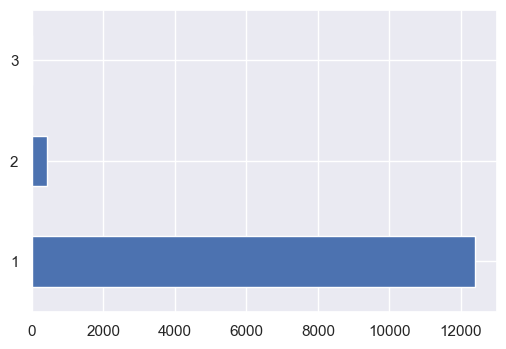

In [53]:
# 3, 4 -> 2,3 
df_cr['loan_type'].mask((df_cr['loan_type'] == 3), 2, inplace=True)
df_cr['loan_type'].mask((df_cr['loan_type'] == 4), 3, inplace=True)

# explore loan_type category
df_cr["loan_type"].value_counts().plot(kind='barh')

##### loan_purpose 
Description: The purpose of covered loan or application
Values: <br>
1 - Home purchase <br>
2 - Home improvement <br>
31 - Refinancing <br>
32 - Cash-out refinancing <br>
4 - Other purpose <br>
5 - Not applicable 

CHANGE - 31, 32 -> 3 - Refinancing; dropped 19 values of "not applicable" 

In [54]:
df_cr["loan_purpose"].replace([31, 32], 3, regex=False, inplace=True)

In [55]:
# 19 values of "not applicable" 
len(df_cr[df_cr['loan_purpose'] == 5])

17

In [56]:
# 5 -> NAs
df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == 5), None, inplace=True)

In [57]:
# drop 19 values
df_cr = df_cr[pd.to_numeric(df_cr['loan_purpose'].notnull(),errors='coerce')]

In [58]:
# changed 1, 2, 3, 4, 5 to their corresponding categorical names
# df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == 1), 'Home Purchase', inplace=True)
# df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == 2), 'Home Improvement', inplace=True)
# df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == 3), 'Refinancing', inplace=True)
# df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == 4), 'Other Purpose', inplace=True)

In [59]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

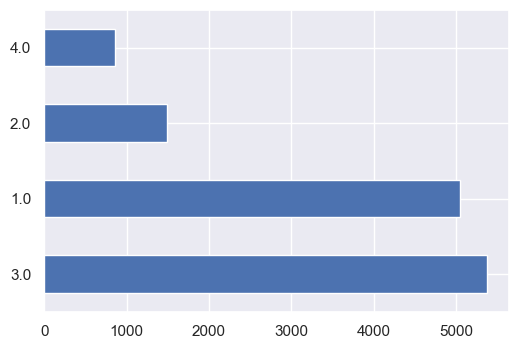

In [60]:
# explore loan_purpose category
df_cr["loan_purpose"].value_counts().plot(kind='barh')

##### is_not_hispanic (old: derived_ethnicity)

In [61]:
pd.unique(df_cr['derived_ethnicity'])

array(['Not Hispanic or Latino', 'Hispanic or Latino', 'Joint',
       'Ethnicity Not Available', 'Free Form Text Only'], dtype=object)

In [62]:
# Convert 'Joint', 'Ethnicity Not Available', 'Free Form Text Only' to NAs
df_cr['derived_ethnicity'].mask((df_cr['derived_ethnicity'] == 'Joint') |
                                (df_cr['derived_ethnicity'] == 'Ethnicity Not Available') |
                                (df_cr['derived_ethnicity'] == 'Free Form Text Only'), None, inplace=True)

In [63]:
df_cr['derived_ethnicity'].map(type).value_counts()

<class 'str'>         11129
<class 'NoneType'>     1653
Name: derived_ethnicity, dtype: int64

In [64]:
# drop 1878 null values
df_cr = df_cr[pd.to_numeric(df_cr['derived_ethnicity'].notnull(),errors='coerce')]

In [65]:
df_cr['derived_ethnicity'].map(type).value_counts()

<class 'str'>    11129
Name: derived_ethnicity, dtype: int64

In [66]:
# change column name 'derived_ethnicity' -> 'is_not_hispanic'
df_cr.rename(columns={'derived_ethnicity': 'is_not_hispanic'}, inplace=True)

In [67]:
df_cr['is_not_hispanic'].mask((df_cr['is_not_hispanic'] == "Hispanic or Latino"), 1, inplace=True)
df_cr['is_not_hispanic'].mask((df_cr['is_not_hispanic'] == "Not Hispanic or Latino"), 0, inplace=True)

In [68]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

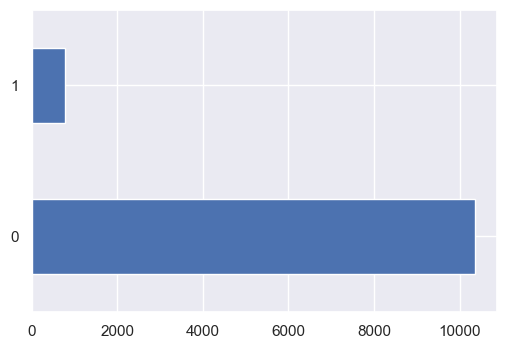

In [69]:
# explore is_not_hispanic category
df_cr["is_not_hispanic"].value_counts().plot(kind='barh')

##### derived_race

In [70]:
pd.unique(df_cr['derived_race'])

array(['Black or African American', 'White', 'Asian',
       '2 or more minority races', 'Race Not Available', 'Joint',
       'Native Hawaiian or Other Pacific Islander',
       'American Indian or Alaska Native', 'Free Form Text Only'],
      dtype=object)

In [71]:
# Convert '2 or more minority races', 'Race Not Available','American Indian or Alaska Native', 
# 'Joint', 'Native Hawaiian or Other Pacific Islander' to 'Minority Race/(s/)'
df_cr['derived_race'].mask((df_cr['derived_race'] == '2 or more minority races') |
                            (df_cr['derived_race'] == 'American Indian or Alaska Native') |
                            (df_cr['derived_race'] == 'Joint') |
                            (df_cr['derived_race'] == 'Native Hawaiian or Other Pacific Islander'), "Minority Races", inplace=True)

In [72]:
df_cr['derived_race'].mask((df_cr['derived_race'] == 'Free Form Text Only') |
                           (df_cr['derived_race'] == 'Race Not Available'), None, inplace=True)

In [73]:
df_cr['derived_race'].map(type).value_counts()

<class 'str'>         10674
<class 'NoneType'>      455
Name: derived_race, dtype: int64

In [74]:
pd.unique(df_cr['derived_race'])

array(['Black or African American', 'White', 'Asian', 'Minority Races',
       None], dtype=object)

In [75]:
# drop 526 null values
df_cr = df_cr[pd.to_numeric(df_cr['derived_race'].notnull(),errors='coerce')]

In [76]:
pd.unique(df_cr['derived_race'])

array(['Black or African American', 'White', 'Asian', 'Minority Races'],
      dtype=object)

In [77]:
df_cr['derived_race'].mask((df_cr['derived_race'] == "White"), 1, inplace=True)
df_cr['derived_race'].mask((df_cr['derived_race'] == "Asian"), 2, inplace=True)
df_cr['derived_race'].mask((df_cr['derived_race'] == "Black or African American"), 3, inplace=True)
df_cr['derived_race'].mask((df_cr['derived_race'] == "Minority Races"), 4, inplace=True)

In [78]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

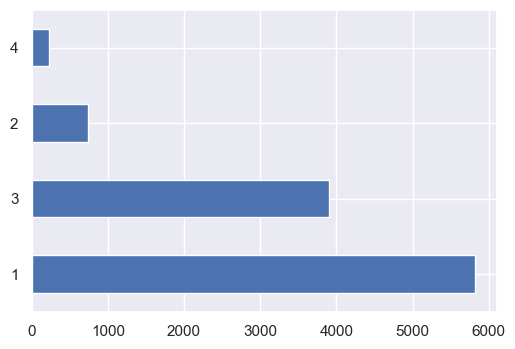

In [79]:
# explore derived_race category
df_cr["derived_race"].value_counts().plot(kind='barh')

##### is_male (old: derived_sex)

In [80]:
pd.unique(df_cr['derived_sex']) # OK

array(['Female', 'Male'], dtype=object)

In [81]:
# change column name 'derived_sex' -> 'is_male'
df_cr.rename(columns={'derived_sex': 'is_male'}, inplace=True)

In [82]:
df_cr['is_male'].mask((df_cr['is_male'] == "Male"), 1, inplace=True)
df_cr['is_male'].mask((df_cr['is_male'] == "Female"), 0, inplace=True)

<AxesSubplot:>

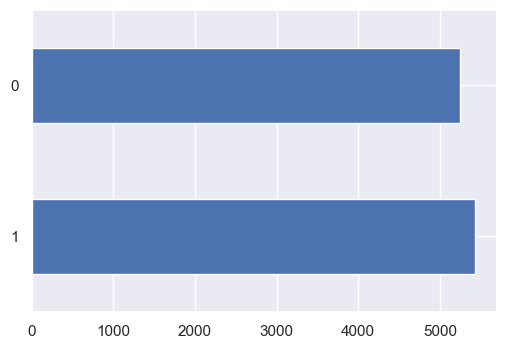

In [83]:
# explore is_male category
df_cr["is_male"].value_counts().plot(kind='barh')

##### debt_to_income_ratio 
Description: The ratio, as a percentage, of the applicant’s or borrower’s total monthly debt to the total monthly income relied on in making the credit decision

In [84]:
pd.unique(df_cr['debt_to_income_ratio']) # should create a new column: 36% - 49%, Exempt = NaN?

array(['48', '44', '38', '42', '50%-60%', '>60%', '30%-<36%', '40', '36',
       '49', '<20%', '43', '20%-<30%', '41', '47', '46', '37', '39', '45',
       nan], dtype=object)

In [85]:
df_cr["debt_to_income_ratio"].replace(['48', '44', '38', '42', '40', '36', '49', '47', '43', '41', '39', '46', '37', '45'], '36%-<50%', regex=False, inplace=True)

In [86]:
# replace "Exempt" with NAs
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == 'Exempt'), None, inplace=True)

In [87]:
# drop null values
df_cr = df_cr[pd.to_numeric(df_cr['debt_to_income_ratio'].notnull(),errors='coerce')]

In [88]:
pd.unique(df_cr['debt_to_income_ratio'])

array(['36%-<50%', '50%-60%', '>60%', '30%-<36%', '<20%', '20%-<30%'],
      dtype=object)

In [89]:
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "<20%"), 1, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "20%-<30%"), 2, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "30%-<36%"), 3, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "36%-<50%"), 4, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "50%-60%"), 5, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == ">60%"), 6, inplace=True)

In [90]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

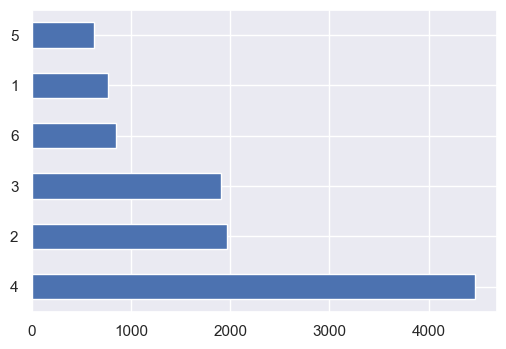

In [91]:
# explore debt_to_income_ratio category
df_cr["debt_to_income_ratio"].value_counts().plot(kind='barh')

##### mid_debt_to_income_ratio  (NEW column for log reg)
Description: Mid values (it's neither median nor average because of lack of info) of the categorical variable debt_to_income_ratio

In [92]:
r_conditions = [
    df_cr['debt_to_income_ratio'] == '<20%',
    df_cr['debt_to_income_ratio'] == '20%-<30%',
    df_cr['debt_to_income_ratio'] == '30%-<36%',
    df_cr['debt_to_income_ratio'] == '36%-<50%',
    df_cr['debt_to_income_ratio'] == '50%-60%',
    df_cr['debt_to_income_ratio'] == '>60%'
]

r_choices = [0.15, 0.25, 0.33, 0.38, 0.55, 0.65]

df_cr['mid_debt_to_income_ratio'] = np.select(r_conditions, r_choices, default=0)

In [93]:
# # explore mid_debt_to_income_ratio category
# df_cr["mid_debt_to_income_ratio"].value_counts().plot(kind='barh')

##### debt  (NEW column for log reg)
Description: debt = mid_debt_to_income_ratio * income

In [94]:
df_cr['debt'] = np.multiply(df_cr['mid_debt_to_income_ratio'], df_cr['income'])

##### applicant_age
Young Adult - 18 - 34 <br>
Middle-Aged Adult - 35-54 <br>
Older Adult - > 55 <br>
(resource: https://academic.oup.com/gerontologist/article/42/1/92/641498)

In [95]:
pd.unique(df_cr['applicant_age']) # 8888
# df_cr[(df_cr['applicant_age'] == '8888')] # print 4 rows with age = 8888

array(['35-44', '>74', '25-34', '55-64', '45-54', '65-74', '<25', '8888'],
      dtype=object)

In [96]:
# drop rows with 8888
df_cr.drop(df_cr.index[df_cr['applicant_age'] == '8888'], inplace=True)

In [97]:
pd.unique(df_cr['applicant_age'])

array(['35-44', '>74', '25-34', '55-64', '45-54', '65-74', '<25'],
      dtype=object)

In [98]:
# reset index
df_cr = df_cr.reset_index(drop = True)

In [99]:
age_conditions = [
    (df_cr['applicant_age'] == '<25') | (df_cr['applicant_age'] == '25-34'),
    (df_cr['applicant_age'] == '35-44') | (df_cr['applicant_age'] == '45-54'),
    (df_cr['applicant_age'] == '55-64') | (df_cr['applicant_age'] == '65-74') | (df_cr['applicant_age'] == '>74')
]

# *** age_choices = ['Young', 'Middle-Aged', 'Older']
age_choices = [1, 2, 3]

df_cr['applicant_age'] = np.select(age_conditions, age_choices, default=0)

<AxesSubplot:>

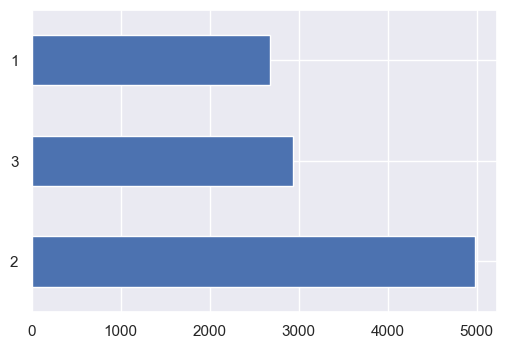

In [100]:
# explore applicant_age category
df_cr["applicant_age"].value_counts().plot(kind='barh')

In [101]:
# cleaned dataset info
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10593 entries, 0 to 10592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_not_hispanic              10593 non-null  object 
 1   derived_race                 10593 non-null  object 
 2   is_male                      10593 non-null  object 
 3   action_taken                 10593 non-null  int64  
 4   preapproval_requested        10593 non-null  int64  
 5   loan_type                    10593 non-null  int64  
 6   loan_purpose                 10593 non-null  float64
 7   loan_amount                  10593 non-null  float64
 8   loan_to_value_ratio          10593 non-null  float64
 9   interest_only_payment        10593 non-null  int64  
 10  balloon_payment              10593 non-null  int64  
 11  income                       10593 non-null  float64
 12  debt_to_income_ratio         10593 non-null  object 
 13  applicant_age   

In [102]:
df_cr

,is_not_hispanic,derived_race,is_male,action_taken,preapproval_requested,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_only_payment,balloon_payment,income,debt_to_income_ratio,applicant_age,log_loan_to_value_ratio,derived_income,derived_loan_to_value_ratio,mid_debt_to_income_ratio,debt
0,0,3,0,1,0,1,3.0,105000.0,75.00,0,0,91.0,4,2,6.228819,3,2,0.0,0.0
1,0,3,0,0,0,1,3.0,275000.0,52.38,0,0,142.0,4,3,5.710944,4,2,0.0,0.0
2,1,1,1,0,0,1,1.0,235000.0,80.00,0,0,60.0,4,2,6.321928,3,2,0.0,0.0
3,0,1,1,1,0,1,1.0,465000.0,94.69,0,0,112.0,4,2,6.565140,4,3,0.0,0.0
4,0,3,1,1,1,2,1.0,415000.0,100.00,0,0,83.0,5,1,6.643856,3,4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10588,1,1,1,0,0,1,3.0,225000.0,75.00,0,0,76.0,6,3,6.228819,3,2,0.0,0.0
10589,0,3,1,1,0,1,1.0,345000.0,80.00,0,0,168.0,4,1,6.321928,4,2,0.0,0.0
10590,0,3,1,0,0,1,3.0,385000.0,75.00,0,0,160.0,4,1,6.228819,4,2,0.0,0.0
10591,0,1,1,1,0,1,3.0,655000.0,77.00,0,0,150.0,4,3,6.266787,4,2,0.0,0.0


#### Understand Numerical Feature Distribution
##### loan_amount, loan_to_value_ratio, income

<AxesSubplot:xlabel='action_taken', ylabel='loan_to_value_ratio'>

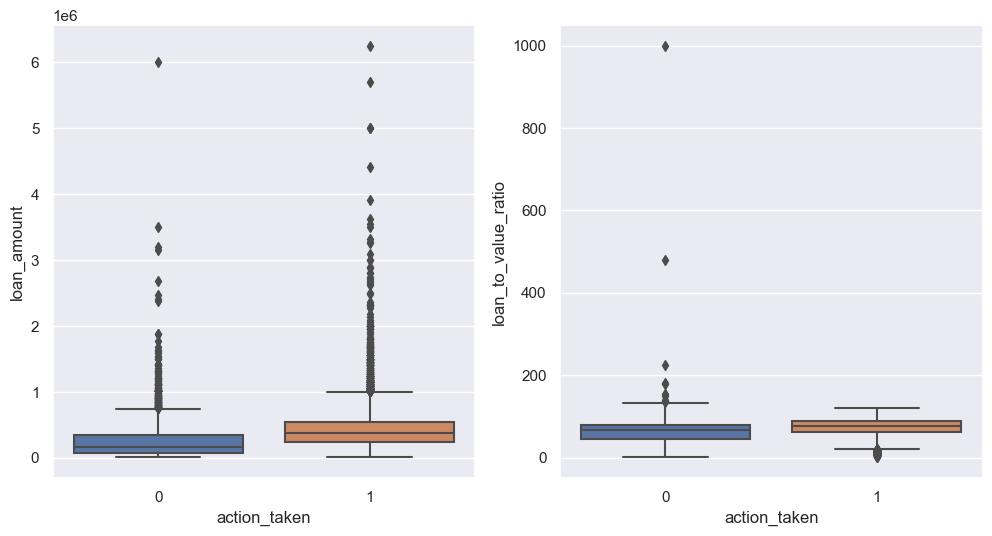

In [103]:
_,axs = plt.subplots(1,2, figsize=[12,6])
_.title = "title"
sns.boxplot(x='action_taken', y='loan_amount', data=df_cr, ax=axs[0])
sns.boxplot(x='action_taken', y='loan_to_value_ratio', data=df_cr, ax=axs[1])

<AxesSubplot:xlabel='action_taken', ylabel='debt'>

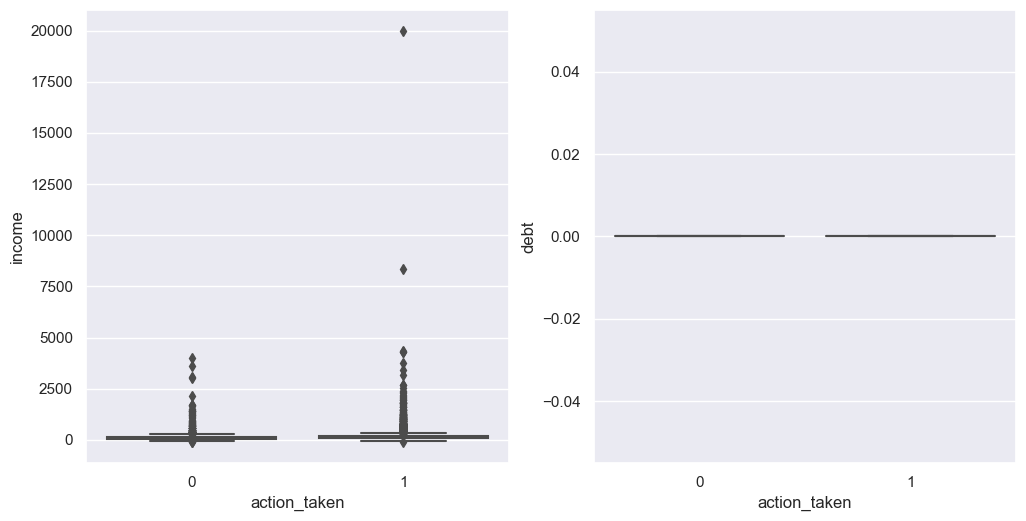

In [104]:
 _,axs = plt.subplots(1,2, figsize=[12,6])
sns.boxplot(x='action_taken', y='income', data=df_cr, ax=axs[0])
sns.boxplot(x='action_taken', y='debt', data=df_cr, ax=axs[1])

#### Understand Categorical Feature Distribution
##### derived_income, derived_loan_to_value_ratio, debt, derived_ethnicity, derived_race, interest_only_payment, balloon_payment, derived_sex, preapproval, loan_type,  loan_purpose

<AxesSubplot:xlabel='action_taken', ylabel='count'>

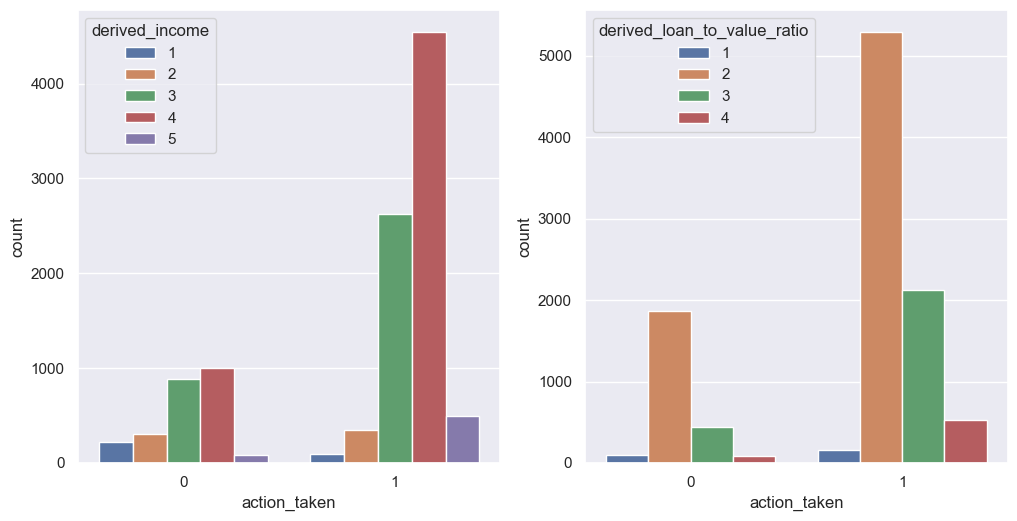

In [105]:
 _,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='derived_income', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='derived_loan_to_value_ratio', data=df_cr, ax=axss[1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

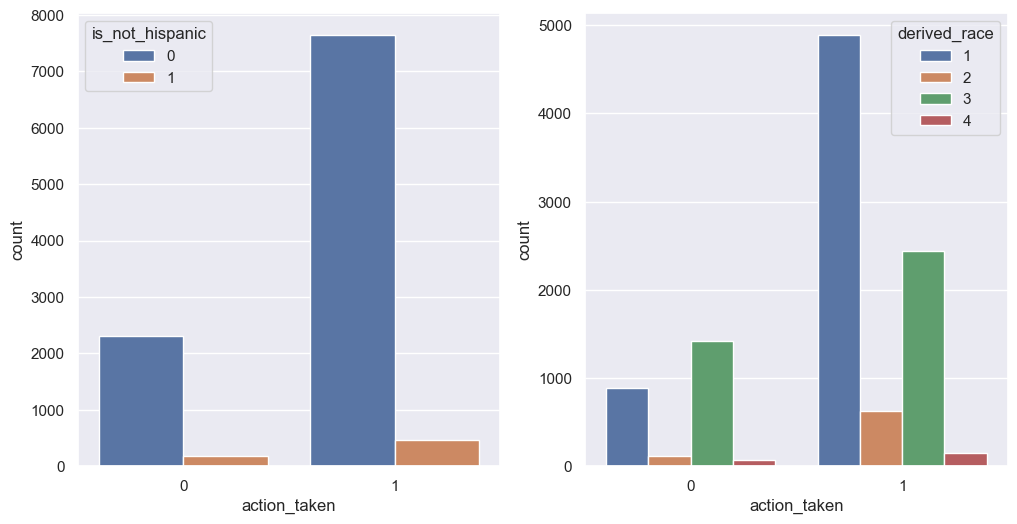

In [106]:
 _,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='is_not_hispanic', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='derived_race', data=df_cr, ax=axss[1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

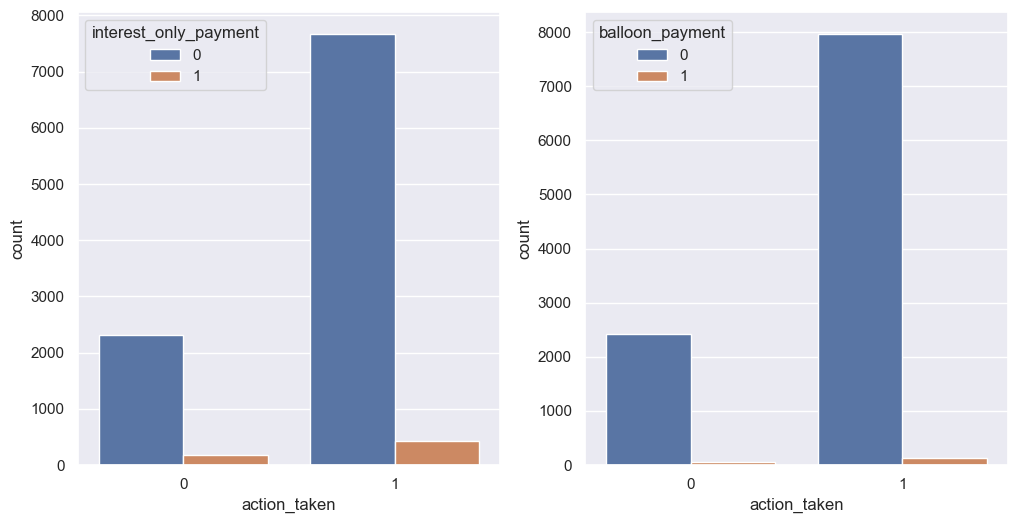

In [107]:
_,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='interest_only_payment', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='balloon_payment', data=df_cr, ax=axss[1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

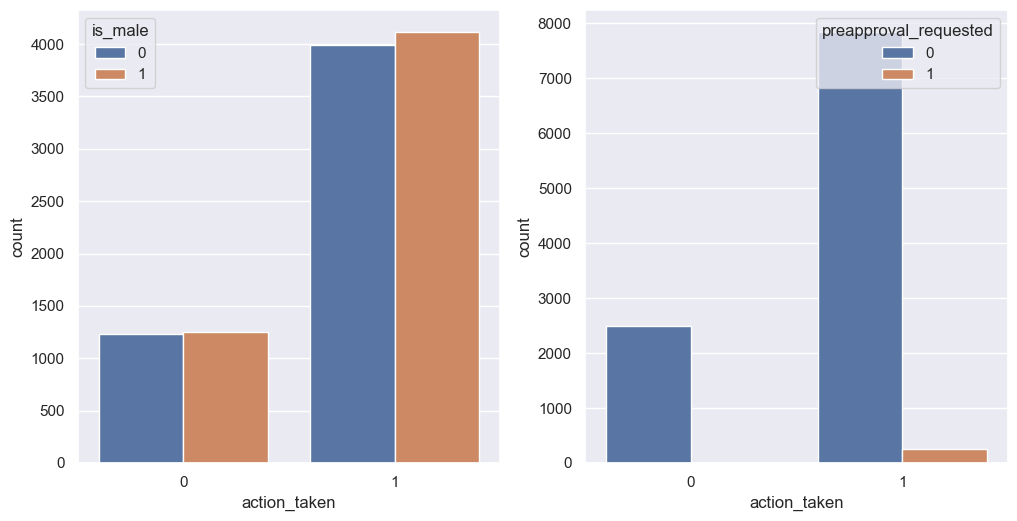

In [108]:
_,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='is_male', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='preapproval_requested', data=df_cr, ax=axss[1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

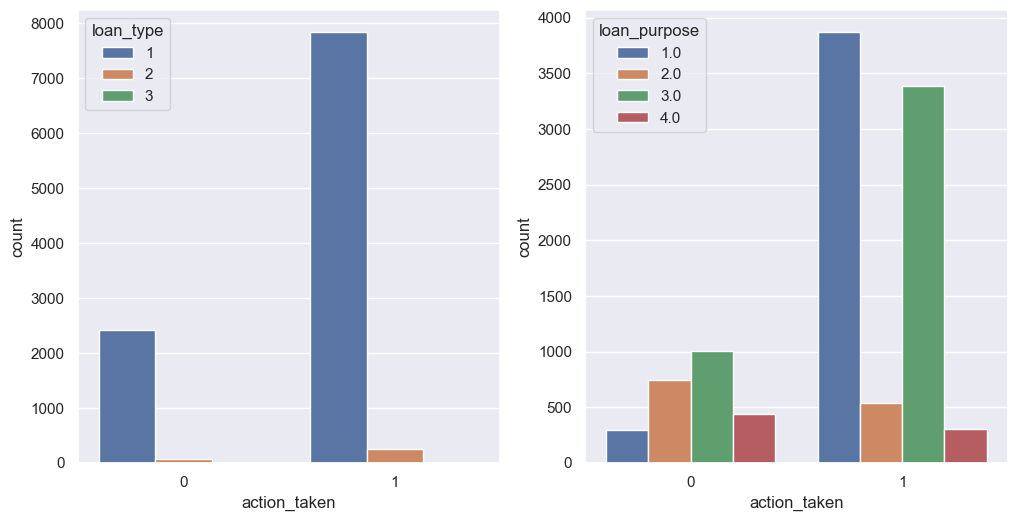

In [109]:
_,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='loan_type', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='loan_purpose', data=df_cr, ax=axss[1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

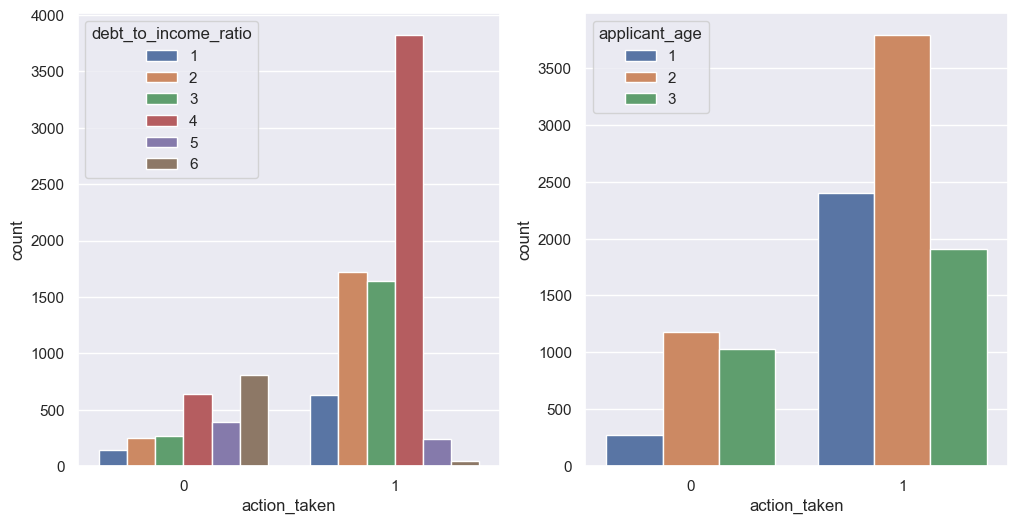

In [110]:
_,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='debt_to_income_ratio', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='applicant_age', data=df_cr, ax=axss[1])

In [111]:
df_cr

,is_not_hispanic,derived_race,is_male,action_taken,preapproval_requested,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_only_payment,balloon_payment,income,debt_to_income_ratio,applicant_age,log_loan_to_value_ratio,derived_income,derived_loan_to_value_ratio,mid_debt_to_income_ratio,debt
0,0,3,0,1,0,1,3.0,105000.0,75.00,0,0,91.0,4,2,6.228819,3,2,0.0,0.0
1,0,3,0,0,0,1,3.0,275000.0,52.38,0,0,142.0,4,3,5.710944,4,2,0.0,0.0
2,1,1,1,0,0,1,1.0,235000.0,80.00,0,0,60.0,4,2,6.321928,3,2,0.0,0.0
3,0,1,1,1,0,1,1.0,465000.0,94.69,0,0,112.0,4,2,6.565140,4,3,0.0,0.0
4,0,3,1,1,1,2,1.0,415000.0,100.00,0,0,83.0,5,1,6.643856,3,4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10588,1,1,1,0,0,1,3.0,225000.0,75.00,0,0,76.0,6,3,6.228819,3,2,0.0,0.0
10589,0,3,1,1,0,1,1.0,345000.0,80.00,0,0,168.0,4,1,6.321928,4,2,0.0,0.0
10590,0,3,1,0,0,1,3.0,385000.0,75.00,0,0,160.0,4,1,6.228819,4,2,0.0,0.0
10591,0,1,1,1,0,1,3.0,655000.0,77.00,0,0,150.0,4,3,6.266787,4,2,0.0,0.0


In [112]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10593 entries, 0 to 10592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_not_hispanic              10593 non-null  object 
 1   derived_race                 10593 non-null  object 
 2   is_male                      10593 non-null  object 
 3   action_taken                 10593 non-null  int64  
 4   preapproval_requested        10593 non-null  int64  
 5   loan_type                    10593 non-null  int64  
 6   loan_purpose                 10593 non-null  float64
 7   loan_amount                  10593 non-null  float64
 8   loan_to_value_ratio          10593 non-null  float64
 9   interest_only_payment        10593 non-null  int64  
 10  balloon_payment              10593 non-null  int64  
 11  income                       10593 non-null  float64
 12  debt_to_income_ratio         10593 non-null  object 
 13  applicant_age   

In [113]:
df_cr = df_cr.drop(columns=['income','log_loan_to_value_ratio', 'mid_debt_to_income_ratio', 'debt', 'loan_amount'])

In [114]:
df_cr.rename(columns={'derived_income': 'income'}, inplace=True)
df_cr.rename(columns={'derived_race': 'race'}, inplace=True)
df_cr.rename(columns={'is_not_hispanic': 'ethnicity'}, inplace=True)
df_cr.rename(columns={'is_male': 'gender'}, inplace=True)
df_cr.rename(columns={'applicant_age': 'age'}, inplace=True)

In [115]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10593 entries, 0 to 10592
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ethnicity                    10593 non-null  object 
 1   race                         10593 non-null  object 
 2   gender                       10593 non-null  object 
 3   action_taken                 10593 non-null  int64  
 4   preapproval_requested        10593 non-null  int64  
 5   loan_type                    10593 non-null  int64  
 6   loan_purpose                 10593 non-null  float64
 7   loan_to_value_ratio          10593 non-null  float64
 8   interest_only_payment        10593 non-null  int64  
 9   balloon_payment              10593 non-null  int64  
 10  debt_to_income_ratio         10593 non-null  object 
 11  age                          10593 non-null  int32  
 12  income                       10593 non-null  int32  
 13  derived_loan_to_

In [116]:
df_cr.to_csv('data/Fairlearn.csv', index = False)